<h2><p style='text-align: center;'>Eduardo Vieira</p></h2>
<p style='text-align: center;'>Universidad Central de Venezuela <br>
Escuela de Ingeniería Mecánica <br>
eduardo.vieira@ucv.ve<br>
Profesor: Arturo Gil</p>

<h1> Estudio de la cinemática Directa y cinemática inversa de un manipulador plano de 3 grados de libertad </h1>
<br> 
__Se tiene:__ El siguiente manipulador plano <br>
<img src="Robot.png">
<br>
__Se pide:__
<ul>
<li>1.    Definir la matriz de Denvit-Hatenberg.</li>
<li>2.    Estudiar la cinématica directa.</li>
<li>3.    Estudiar la cinématica inversa.</li>
</ul>

__Solución:__ <br>
Se importan las librerías a utilizar. En este caso importamos Sympy, para los cálculos de álgebra simbólica.

In [1]:
import sympy as sym  # Librería para Cálculo de Algebra Simbólica 
sym.init_printing(use_latex=True)      # Activamos la salida en LaTex
from sympy.abc import alpha, theta  #Importamos los simbolos alpha y theta

Definimos una función llamda MDH que al introducirle los valores de theta, d, a y alpha no da la matriz de Denavit-Hatenbreg

In [2]:
def MDH(theta, d, a, alpha):
    dh = sym.zeros(4,4)
    dh[0,0]=sym.cos(theta)
    dh[0,1]=-sym.cos(alpha)*sym.sin(theta)
    dh[0,2]=sym.sin(alpha)*sym.sin(theta)
    dh[0,3]=a*sym.cos(theta)
    dh[1,0]=sym.sin(theta)
    dh[1,1]=sym.cos(alpha)*sym.cos(theta)
    dh[1,2]=-sym.sin(alpha)*sym.cos(theta)
    dh[1,3]=a*sym.sin(theta)
    dh[2,0]=0
    dh[2,1]=sym.sin(alpha)
    dh[2,2]=sym.cos(alpha)
    dh[2,3]=d
    dh[3,0]=0
    dh[3,1]=0
    dh[3,2]=0
    dh[3,3]=1
    return dh

Definimos las variables simbólicas correspondientes a las artículaciones del robot

In [3]:
q_1,q_2,q_3 = sym.symbols('q_1 q_2 q_3')

Definimos las longitudes de los eslabones

In [4]:
l_1 = 4 #[m]
l_2 = 3 #[m]
l_3 = 2 #[m]

El algoritmo de Denavit-Hatenberg es el siguiente: <br>
<li>1.    Numerar los eslabones comenzando con $1$ (primer eslabón móvil dela cadena) y acabando con $n$ (último eslabón móvil). Se numerará como eslabón $0$ a la base fija del robot.</li>

<li>2.    Numerar cada articulación comenzando por $1$ (la correspondiente al primer grado de libertad) y acabando en $n$.</li>

<li>3.    Localizar el eje de cada articulación. Si esta es rotativa, el eje será su propio eje de giro. Si es prismática, será el eje a lo largo del cual se produce el desplazamiento.</li>

<li>4.    Para $i$ de $0$ a $n-1$, situar el eje $Z_i$, sobre el eje de la articulación $i+1$.</li>

<li>5.    Situar el origen del sistema de la base ($S_0$) en cualquier punto del eje $Z_0$. Los ejes $X_0$ e $Y_0$ se situaran dé modo que formen un sistema dextrógiro con $Z_0$.</li>

<li>6.    Para $i$ de $1$ a $n-1$, situar el sistema ($S_i$) (solidario al eslabón $i$) en la intersección del eje $Z_i$ con la línea normal común a $Z_{i-1}$ y $Z_i$. Si ambos ejes se cortasen se situaría ($S_i$) en el punto de corte. Si fuesen paralelos ($S_i$) se situaría en la articulación $i+1$.</li>

<li>7.    Situar Xi en la línea normal común a Zi-1 y Zi.</li>

<li>8.    Situar Yi de modo que forme un sistema dextrógiro con Xi y Zi.</li>

<li>9.    Situar el sistema (Sn) en el extremo del robot de modo que Zn coincida con la dirección de Zn-1 y Xn sea normal a Zn-1 y Zn.</li>

<li>10.    Obtener Øi como el ángulo que hay que girar en torno a Zi-1 para que Xi-1 y Xi queden paralelos.</li>

<li>11.    Obtener Di como la distancia, medida a lo largo de Zi-1, que habría que desplazar (Si-1) para que Xi y Xi-1 quedasen alineados.</li>

<li>12.    Obtener Ai como la distancia medida a lo largo de Xi (que ahora coincidiría con Xi-1) que habría que desplazar el nuevo (Si-1) para que su origen coincidiese con (Si).</li>

<li>13.    Obtener ai como el ángulo que habría que girar entorno a Xi (que ahora coincidiría con Xi-1), para que el nuevo (Si-1) coincidiese totalmente con (Si).</li>

<li>14.    Obtener las matrices de transformación i-1Ai.</li>

<li>15.    Obtener la matriz de transformación que relaciona el sistema de la base con el del extremo del robot T = 0Ai, 1A2... n-1An.</li>

<li>16.    La matriz T define la orientación (submatriz de rotación) y posición (submatriz de traslación) del extremo referido ala base en función de las n coordenadas articulares.</li>

Al aplicar el algoritmo quedaría:
<img src="RobotDH5.png">
Los parámetros de Denavit-Hartenberg para cada articulación serían: <br>

<table>
<tr>
  <td><strong>Articulación</strong></td>
  <td><strong>&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp;  $\theta$ &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; </strong></td>
  <td><strong>&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp;d&nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp;</strong></td>
  <td><strong>&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp;a&nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp;</strong></td>
  <td><strong>&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp;$\alpha$&nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp;</strong></td>
</tr>
 
<tr>
  <td>1</td>
  <td>$q_1$</td>
  <td>0</td>
  <td>$l_1$</td>
  <td>0</td>
</tr>
<tr>
  <td>2</td>
  <td>$q_2 - \pi$</td>
  <td>0</td>
  <td>$l_2$</td>
  <td>0</td>
</tr>
<tr>
  <td>3</td>
  <td>$q_3 - \pi$</td>
  <td>0</td>
  <td>$l_3$</td>
  <td>0</td>
</tr>
 
</table>

La matriz de transformación $^{0}T_{1}$ será 

In [5]:
T_1 = MDH(q_1, 0, l_1, 0)
T_1

$^{1}T_{2}$:

In [6]:
T_2 = MDH(q_2-sym.pi, 0, l_2, 0)
T_2

Y finalmente $^{2}T_{3}$:

In [7]:
T_3 = MDH(q_3-sym.pi, 0, l_3, 0)
T_3

La matriz de transformación que relciona el extremo de la herramienta del robot con el sistema definido en la base $T$ será $T = ^{0}T_{1} \cdot ^{1}T_{2} \cdot ^{2}T_{3}$

In [8]:
T = T_1 * T_2 * T_3
T

Sean $x_r$, $y_r$ y $z_r$ las coordenadas de un punto medidas desde el sistema de referencia ubicado en el extremo del robot. 

In [9]:
P_r = sym.zeros(4,1)
x_r, y_r, z_r = sym.symbols('x_r y_r z_r')
P_r[0,0] = x_r
P_r[1,0] = y_r
P_r[2,0] = z_r
P_r[3,0] = 1
P_r

Entonces, el mismo punto medido en el sistema de referencia de la base tendrá las coordenadas

In [10]:
T*P_r

El punto que determina la ubicación de la herramienta se obtiene de la siguiente manera

In [11]:
P_r[0,0] = 0
P_r[1,0] = 0
P_r[2,0] = 0
P=T*P_r
P

En la siguiente entrada determinaremos la posición de la herramienta modificando los valores de $q_1$, $q_2$ y $q_3$ en los widgets interactivos

x [m] =  1.22474487139
y [m] =  4.4321093781
Ángulo [deg] =  -15.0


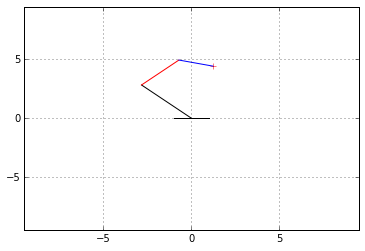

In [12]:
import matplotlib.pyplot as plt
#plt.style.use('bmh')
from numpy import sin, cos, pi, arctan2
from IPython.html.widgets import interact, FloatSlider, interactive
from IPython.display import display
%matplotlib inline
fact = 180 / pi
def punto(q1,q2,q3):
    x = -2*(sin(q1)*sin(q2) - cos(q1)*cos(q2))*cos(q3) - 2 * \
    (sin(q1)*cos(q2) + sin(q2)*cos(q1))*sin(q3) + 3*sin(q1)*sin(q2) - \
    3*cos(q1)*cos(q2) + 4*cos(q1)
    
    y = -2*(sin(q1)*sin(q2) - cos(q1)*cos(q2))*sin(q3) - 2 * \
    (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*cos(q3) - 3*sin(q1)*cos(q2) + \
    4*sin(q1) - 3*sin(q2)*cos(q1)
    
    x1 = 4*cos(q1)
    y1 = 4*sin(q1)
    x2 = 3*sin(q1)*sin(q2)-3*cos(q1)*cos(q2)+4*cos(q1)
    y2 = -3*sin(q1)*cos(q2)+4*sin(q1)-3*sin(q2)*cos(q1)
    plt.plot(x,y,'r+')
    plt.ylim(-9.5,9.5)
    plt.xlim(-9.5,9.5)
    plt.plot([0,x1],[0,y1],'k-')
    plt.plot([x1,x2],[y1,y2],'r-')
    plt.plot([x2,x],[y2,y],'b-')
    plt.plot([-1,1],[0,0],'k-')
    plt.grid(True)
    print "x [m] = ", x
    print "y [m] = ",y
    print "Ángulo [deg] = ", fact * arctan2((y-y2),(x-x2))
q1_slider = FloatSlider(min=-2*pi, max=2*pi, step=0.1, value=3*pi/4, \
                        description='Angulo $q_1$')
q2_slider = FloatSlider(min=-2*pi, max=2*pi, step=0.1, value=pi/2, \
                        description='Angulo $q_2$')
q3_slider = FloatSlider(min=-2*pi, max=2*pi, step=0.1, value=2*pi/3, \
                        description='Angulo $q_3$')
w=interactive(punto,q1=q1_slider,q2=q2_slider,q3=q3_slider)
display(w)

Realizaremos la cinemática inversa mediate métodos geométricos. Sea $P_{her}$ el punto desado de la herramienta con coordenadas $x_h$ y $y_h$ ($z_h=0$ al tratarse de un robot plano) y formando un ángulo $\theta_h$ con la horizontal. 

In [13]:
x_h, y_h, theta_h = sym.symbols('x_h y_h theta_h')
z_h = 0

Por trigonometría las coordenadas de la articulación 3 serán $x_3 = x_h - l_3 * cos(\theta)$ y $y_3 = y_h - l_3 * sin(\theta)$. Podemos obtener $q_1$ y $q_2$ con $q_2 = arctg({{\pm \sqrt{1-cos^2 (q_2)}} \over {cos (q_2)}})$ donde $cos (q_2) =  {{x_3^2 + y_3^2 - l_1^2 - l_2^2} \over {2 l_1 l_2}}$ y $q_1 = arctg({{y_3}\over{\pm x_3}})-arctg({{l_2 sin(q_2)} \over {l_1 + l_2 cos(q_2)}})$ (Barrientos, Fundamentos de Robótica, 2007). <br>
Con estas fórmulas escribimos el algoritmo en python:

q1 [deg] =  40.5663998888
q2 [deg] =  95.4667838701
q3 [deg] =  109.03140576
l1 [m] =  4.0 4
l2 [m] =  3.0 3
l3 [m] =  2.0 2


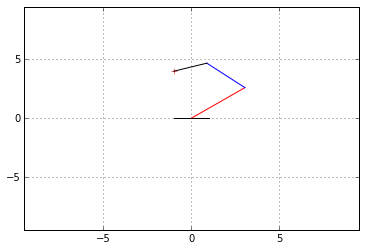

In [14]:
from numpy import sqrt, arcsin
def cin_inv(x,y,theta):
    theta = theta / fact
    x_3 = x - l_3 * cos(theta)
    y_3 = y - l_3 * sin(theta)
    cos_q_2 = (x_3**2 + y_3**2 - l_1**2 - l_2**2) / (2 * l_1 * l_2)
    q_2 = arctan2(sqrt(1 - (cos_q_2)**2),cos_q_2)
    q_1 = arctan2(y_3,x_3) - arctan2((l_2 * sin(q_2)),(l_1 + l_2 * cos_q_2))
    l = sqrt(l_1**2 + l_2**2 - 2 * l_1 * l_2 * cos_q_2)
    alpha = arcsin(l_1 * sin(q_2) / l)
    beta = arctan2(y_3,x_3)
    k = pi - theta
    q_3 = (alpha + k + beta)
    plt.plot(x, y, 'r+')
    plt.ylim(-9.5, 9.5)
    plt.xlim(-9.5, 9.5)
    plt.plot([-1,1],[0,0],'k-')
    x_2 = l_1 * cos(q_1)
    y_2 = l_1 * sin(q_1)
    x_1 = 0
    y_1 = 0
    plt.plot([x_1,x_2],[y_1,y_2],'r-')
    plt.plot([x_2,x_3],[y_2,y_3],'b-')
    plt.plot([x_3,x],[y_3,y],'k-')
    plt.grid(True)
    print "q1 [deg] = ", q_1 * fact
    print "q2 [deg] = ", q_2 * fact
    print "q3 [deg] = ", q_3 * fact
    print "l1 [m] = ", sqrt((x_2**2)+(y_2**2)), l_1
    print "l2 [m] = ", sqrt(((x_2-x_3)**2)+((y_2-y_3)**2)), l_2
    print "l3 [m] = ", sqrt(((x_3-x)**2)+((y_3-y)**2)), l_3
x_slider = FloatSlider(min=-9, max=9, step=0.1, value=-1, description='X')
y_slider = FloatSlider(min=-9, max=9, step=0.1, value=4, description='Y')
theta_slider = FloatSlider(min=0, max=360, step=0.1, value=200, description='Theta')
w=interactive(cin_inv,x=x_slider,y=y_slider,theta=theta_slider)
display(w)